In [8]:
#4 Choosing Models

In [44]:
#Import stuff

import emcee
import cPickle
import scipy.optimize as op
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def pickle_from_file(fname):
    fh = open(fname, 'r')
    data = cPickle.load(fh)
    fh.close()
    return data



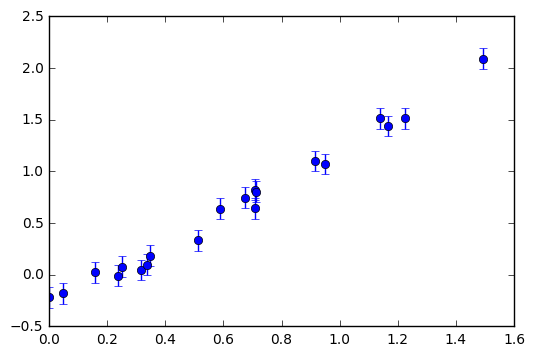

In [46]:
d = pickle_from_file('data-for-poly-test.pkl')

plt.errorbar(d['x'], d['y'], yerr=d['sigma_y'], fmt='o')
plt.show()

9
9


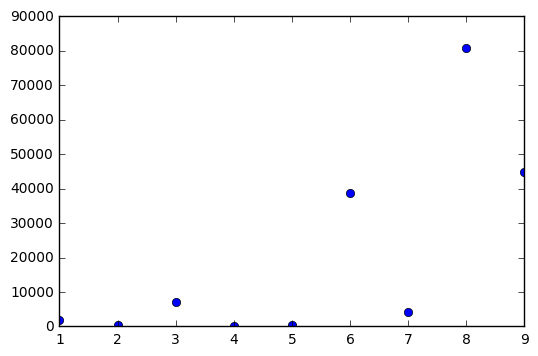

In [47]:
#Define likelihood, prior and posterior

#Define likelihook  (a) and (b)
def neglnL(theta, x, y, yerr, n):
    model = np.polynomial.polynomial.polyval(x, theta)
    inv_sigma2 = 1.0/(yerr**2)
    return 0.5*(np.sum((y-model)**2*inv_sigma2))

def lnL(theta, x, y, yerr):
    model = np.polynomial.polynomial.polypow(theta, n, maxpower=None)
    inv_sigma2 = 1.0/(yerr**2)
    return -0.5*(np.sum((y-model)**2*inv_sigma2))


n=9
array_ml = []
nums=[]
for i in range (1, n+1):
    theta = np.random.randn(i)
    array_ml.append(neglnL(theta, d['x'], d['y'], d['sigma_y'], i))
    nums.append(i)
print len(array_ml)
print len(nums)
plt.plot(nums, array_ml, 'o')

In [93]:
def neglnL(theta, x, y, yerr):
    a, b = theta
    model = b * x + a
    inv_sigma2 = 1.0/(yerr**2)
    return 0.5*(np.sum((y-model)**2*inv_sigma2))

result = op.minimize(neglnL, [1.0, 0.0], args=(d['x'], d['y'], d['sigma']))
a_ml, b_ml = result["x"]

print result

      fun: 2.684763983581953
 hess_inv: array([[ 0.02844318,  0.00053214],
       [ 0.00053214,  0.00901792]])
      jac: array([ -2.98023224e-08,  -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.28233725,  1.31299656])


In [100]:
#3.c Setup the initial positions and run the MCMC code:

p_init = np.array([ a_ml, b_ml])

# Set up the properties of the problem.
ndim, nwalkers = 2, 100
# Setup a number of initial positions.
pos = [p_init + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
# Create the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(d['x'], d['y'],
d['sigma']))
# Run the process.
sampler.run_mcmc(pos,500)

(array([[ 0.34828525,  1.19042664],
        [ 0.13077521,  1.42261985],
        [ 0.15435806,  1.24789105],
        [ 0.45987233,  1.42074497],
        [-0.02359101,  1.26726388],
        [ 0.26750361,  1.30262261],
        [ 0.28157056,  1.31252742],
        [ 0.36739088,  1.39929221],
        [ 0.30315402,  1.2190963 ],
        [ 0.26097466,  1.4090994 ],
        [ 0.62018369,  1.10786907],
        [ 0.19341058,  1.38759322],
        [ 0.44951996,  1.28313977],
        [ 0.34857423,  1.59567581],
        [ 0.55626682,  1.17862954],
        [ 0.5063883 ,  1.41627025],
        [ 0.35600109,  1.18729062],
        [ 0.19829158,  1.23715646],
        [ 0.23792166,  1.40243485],
        [ 0.4555022 ,  1.36004123],
        [ 0.43438559,  1.27978721],
        [-0.03284424,  1.24479706],
        [ 0.51463705,  1.40286049],
        [ 0.09228809,  1.30039836],
        [ 0.1429476 ,  1.2178772 ],
        [ 0.15123034,  1.31860187],
        [ 0.26853868,  1.33921661],
        [ 0.18183493,  1.482

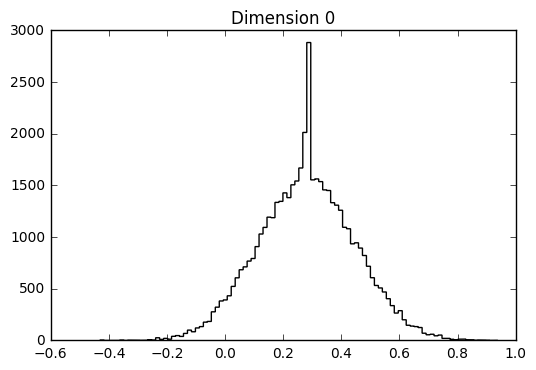

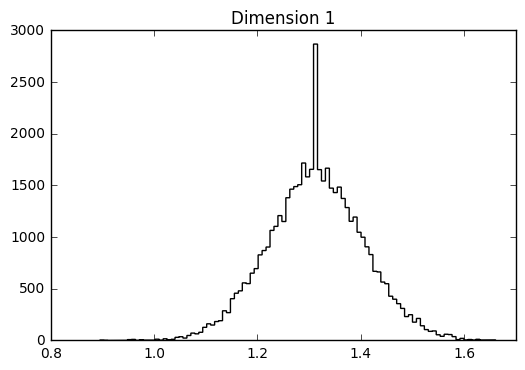

In [101]:
for i in range(ndim):
    pl.figure()
    pl.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    pl.title("Dimension {0:d}".format(i))

pl.show()